In [1]:
!pip install transformers datasets evaluate

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("xlnet-base-cased")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import os
main_dir = os.path.join(os.path.dirname('/content/'), 'testData')
os.mkdir(main_dir)

import zipfile
with zipfile.ZipFile('/content/testData.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/testData')

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = tf.keras.preprocessing.text_dataset_from_directory("/content/testData")

texts = []
labels = []
for text_batch, label_batch in dataset:
    texts.extend(text.numpy().decode('utf-8') for text in text_batch)
    labels.extend(label for label in label_batch)

train_texts, testval_texts, train_labels, testval_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=42, stratify=labels)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    testval_texts, testval_labels, test_size=0.5, random_state=42, stratify=testval_labels)

print("Training samples:", len(train_texts))
print("Validation samples:", len(val_texts))
print("Test samples:", len(test_texts))

from datasets.dataset_dict import DatasetDict
from datasets import Dataset

d = {'train':Dataset.from_dict({'text':train_texts, 'label':train_labels}),
     'test':Dataset.from_dict({'text':test_texts,'label':test_labels}),
     'validation':Dataset.from_dict({'text':val_texts, 'label':val_labels})
     }

datasetDict = DatasetDict(d)

Found 7584 files belonging to 7 classes.
Training samples: 5308
Validation samples: 1138
Test samples: 1138


In [3]:
def preprocess_function(examples):
    print(examples["text"])
    return tokenizer(examples["text"], truncation=True)

In [4]:
tokenized_dataset = datasetDict.map(preprocess_function, batched=True)

from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

import evaluate

#https://huggingface.co/evaluate-metric

precision = evaluate.load("precision")
recall = evaluate.load('recall')
f1 = evaluate.load("f1")

Map:   0%|          | 0/5308 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['"I had to undergo an operation in Summer and so my family had to stay at home during the holidays.  I felt guilty above all because of my brothers."\r\n', '"I greeted and embraced the wrong person thinking that it was my friend."\r\n', '"Missing lectures and avoiding university work for no reason when it had to be done."\r\n', '"The results of the mid term examinations were very poor."\r\n', '"I felt happy when my mother borrowed me the car in order to let me go out alone for the first time."\r\n', '"When I failed an exam for which I knew that I had not studied hard enough."\r\n', '"At school a classmate who was a very good pupil had to help another boy who performed less well. He told him on purpose the wrong things so that he had to repeat a year."\r\n', '"Heard someone boasting his fortune telling and I knew he was lying."\r\n', '"When I was working in Delhi I had gone alone to see the hostel where I would be residing."\r\n', '"While playing I urinated on grandma\'s floor and did 

Map:   0%|          | 0/1138 [00:00<?, ? examples/s]

['"I felt anger at my roommate due to his habit of leaving dirty dishes in the sink and generally not cleaning after himself."\r\n', '"Few years ago my father was very ill. He stayed at a hospital for a long time. Then I experienced that terrible feeling that I might lose him."\r\n', '"When my mother was very sick and almost died."\r\n', '"When my boyfriend told me that it would be difficult for him to marry me."\r\n', '"NO RESPONSE."\r\n', '"One day I came across a certain boy who was intruding my friendship as lovers with my girlfriend and I was very sad because I didn\'t expect that girl to disappoint me I regarded her as being very faithful."\r\n', '"Achieving my goal at a swim meet. I worked toward the goal for 9 yrs. I was capable of achieving it but I didn\'t know when."\r\n', '"I had received bad news informing me that grandmother and grandfather had passed away. The first one to die was my grandmother and after two days grandfather died too."\r\n', '"I was very happy when I re

Map:   0%|          | 0/1138 [00:00<?, ? examples/s]

['"When my mother told things to my sister which I told my mother in confindence."\r\n', '"I was skiing with friends and they wanted to ski-jump. I did not want to be left behind so I braced myself and followed them."\r\n', '"I went to eat at my aunt\'s house and she served macaroni with a horrible appearence. I felt the sensation above. The worst was that I was practically obliged to eat."\r\n', '"After 10 days of hard work and having suffered many changes I passed my last exam."\r\n', '"When I was admitted to the Higher Institute."\r\n', '"I was on the Inter Rail in Naples alone. After an evening in a restaurant I was going back to the hotel when a prostitute approached me to sell herself. I refused but as I carried on walking I felt that I was being followed by someone."\r\n', '"My son was born."\r\n', '"I was not sure whether I should help an old woman going down a flight of stairs. I just watched her and saw how difficult it was for her to do it."\r\n', '"When I received the best 

In [5]:
import numpy as np

def compute_precision(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return precision.compute(predictions=predictions, references=labels, average=None)

def compute_recall(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return recall.compute(predictions=predictions, references=labels, average=None)

def compute_f1(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return f1.compute(predictions=predictions, references=labels, average=None)

In [6]:
#id2label = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
#label2id = {"NEGATIVE": 0, "NEUTRAL": 1, "POSITIVE": 2}

id2label = {0: "ANGER", 1: "DISGUST", 2: "FEAR", 3: "GUILT", 4: "JOY", 5: "SADNESS", 6: "SHAME"}
label2id = {"ANGER": 0, "DISGUST": 1, "FEAR": 2, "GUILT": 3, "JOY": 4, "SADNESS": 5, "SHAME": 6}


In [7]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 3
batches_per_epoch = len(tokenized_dataset["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=4e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "xlnet-base-cased", num_labels=7, id2label=id2label, label2id=label2id
)

tf_train_set = model.prepare_tf_dataset(
    tokenized_dataset["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_dataset["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_dataset["validation"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSeq

In [8]:
import tensorflow as tf
import time

tf.random.set_seed(42)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=4e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

from transformers.keras_callbacks import KerasMetricCallback

micro_precision_callback = KerasMetricCallback(metric_fn=compute_precision, eval_dataset=tf_validation_set)
micro_recall_callback = KerasMetricCallback(metric_fn=compute_recall, eval_dataset=tf_validation_set)
micro_f1_callback = KerasMetricCallback(metric_fn=compute_f1, eval_dataset=tf_validation_set)

callbacks = [micro_precision_callback, micro_recall_callback, micro_f1_callback]

start_time = time.time()
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=num_epochs, callbacks=callbacks)
end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

Epoch 1/3


331/331 [==============================] - 224s 520ms/step - loss: 1.3102 - accuracy: 0.5100 - val_loss: 0.9601 - val_accuracy: 0.6845 - precision: 0.6902 - recall: 0.6838 - f1: 0.6826
Epoch 2/3
331/331 [==============================] - 170s 513ms/step - loss: 0.8060 - accuracy: 0.7275 - val_loss: 0.8741 - val_accuracy: 0.7039 - precision: 0.7128 - recall: 0.7034 - f1: 0.7006
Epoch 3/3
331/331 [==============================] - 149s 452ms/step - loss: 0.5435 - accuracy: 0.8161 - val_loss: 0.9459 - val_accuracy: 0.7065 - precision: 0.7191 - recall: 0.7059 - f1: 0.7062
Elapsed time: 575.45 seconds


In [9]:
test_loss, test_acc = model.evaluate(tf_test_set)
print("Test acc", test_acc)
print("Test loss", test_loss)

72/72 [==============================] - 8s 107ms/step - loss: 0.9481 - accuracy: 0.7109
Test acc 0.7108963131904602
Test loss 0.9481391906738281


72/72 [==============================] - 10s 107ms/step
Precision: 
{'precision': array([0.55      , 0.85576923, 0.86956522, 0.71212121, 0.86285714,
       0.66666667, 0.59887006])}
Recall: 
{'recall': array([0.74233129, 0.54938272, 0.73619632, 0.58385093, 0.91515152,
       0.78527607, 0.65838509])}
F1: 
{'f1': array([0.63185379, 0.66917293, 0.79734219, 0.64163823, 0.88823529,
       0.72112676, 0.62721893])}


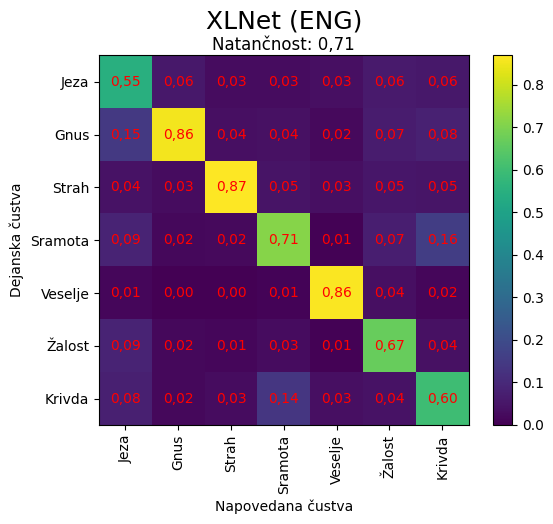

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

preds = model.predict(tf_test_set)
predicted_labels = np.argmax(preds[0], axis=1)

print("Precision: ")
print(precision.compute(predictions=predicted_labels, references=test_labels, average=None))
print("Recall: ")
print(recall.compute(predictions=predicted_labels, references=test_labels, average=None))
print("F1: ")
print(f1.compute(predictions=predicted_labels, references=test_labels, average=None))

conf = confusion_matrix(test_labels, predicted_labels, normalize="pred")
emotions = ["Jeza", "Gnus", "Strah", "Sramota", "Veselje", "Žalost", "Krivda"]
plt.imshow(conf)
formatted_num = "{:,.2f}".format(test_acc).replace(".", ",")
plt.text(3,-0.6,"Natančnost: " + str(formatted_num), ha='center', fontsize=12)
plt.text(3,-1,"XLNet (ENG)", ha='center', fontsize=18)
plt.ylabel("Dejanska čustva")
plt.xlabel("Napovedana čustva")
plt.yticks(np.arange(len(emotions)), emotions)
plt.xticks(np.arange(len(emotions)), emotions, rotation='vertical')
for i in range(conf.shape[0]):
  for j in range(conf.shape[1]):
    formatted_num = "{:,.2f}".format(conf[i][j]).replace(".", ",")
    plt.text(j, i, formatted_num, ha="center", va="center", color="r")
plt.colorbar()
plt.show()



In [ ]:
text = "I pooped my pants when i was 8."

inputs = tokenizer(text, return_tensors="tf")

logits = model(**inputs).logits

predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
model.config.id2label[predicted_class_id]

'SHAME'